# 📊 Post-COVID Leverage & Profitability Analysis – Nifty 50

## Table of Contents
1. Project Overview
2. Dataset Description
3. Methodology
4. Key Findings

---
## 1. Project Overview

### Objective

This analysis evaluates how Nifty 50 companies responded to the post-COVID economic environment by adjusting their capital structures, with a specific focus on changes in Debt-to-Equity ratios. It examines whether firm-level deleveraging was associated with measurable improvements in net profit performance and tests the strength and direction of this relationship using correlation analysis and OLS regression. The objective is to understand whether capital structure adjustments translated into stronger earnings outcomes during the post-pandemic recovery phase.

---

## 2. Dataset Description

The dataset includes:

- Year-wise Net Profit (₹ Cr)  
- Debt-to-Equity Ratio  
- Company Name  
- Pre- and Post-COVID time period  

---

## 3. Key Findings

- -63% of companies reduced leverage post-COVID.  
- Profit growth varied significantly across firms.  
- The relationship between leverage change and profit change appears weak to moderate based on correlation and OLS regression.

---

*Data was cleaned, sorted company-wise, and structured to compute year-over-year profit growth and leverage changes.*

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Copy of Sheet2.csv_(2)(1).csv')


In [85]:
df['Period'] = df['Year'].apply(lambda x: 'Pre-COVID' if x <= 2021 else 'Post-COVID')
#This line creates a new column called “Period” by applying a condition to each value 
#in the Year column using a lambda function, labeling years ≤ 2021 as “Before 2022” and years > 2021 as “2022 Onwards”.
#For each year, check if it is 2021 or earlier — if yes, mark as Pre period; otherwise mark as Post period.


In [86]:
df['Net_Profit_Cr'] = (
    df['Net_Profit_Cr']
    .astype(str)
    .str.replace(',', '')
    .astype(float)
)

In [87]:
df_sorted = df.sort_values(by=['Company Name', 'Year'])

df_sorted['Net_Profit_Growth_%'] = (
    df_sorted.groupby('Company Name')['Net_Profit_Cr']
    .pct_change() * 100
)


In [88]:
df_sorted = df_sorted[df_sorted['Net_Profit_Growth_%'].between(-200, 200)]

avg_growth = df_sorted.groupby('Year')['Net_Profit_Growth_%'].mean().reset_index()

<Axes: xlabel='Year', ylabel='Net_Profit_Growth_%'>

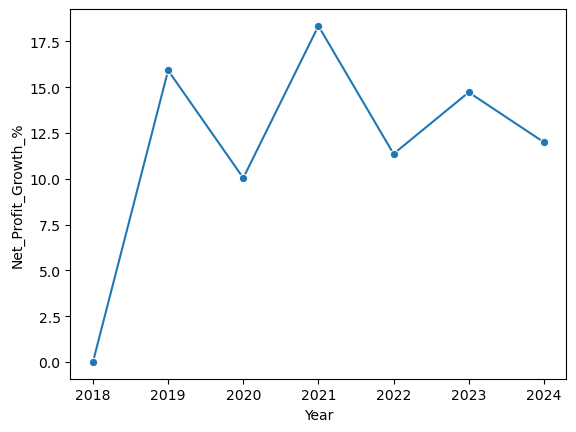

In [89]:
sns.lineplot(data=avg_growth, x='Year', y='Net_Profit_Growth_%', marker='o')

**Insight:** Earnings momentum weakened during the 2020 shock but rebounded strongly in 2021, reflecting broad-based recovery. Subsequent years show moderated yet sustained double-digit growth, pointing toward structural normalization rather than cyclical volatility.

In [90]:
df['DebttoEquity'] = pd.to_numeric(df['DebttoEquity'], errors='coerce')

In [91]:
df_sorted = df.sort_values(by=['Company Name', 'Year'])
df_sorted['Net_Profit_Growth_%'] = df_sorted.groupby('Company Name')['Net_Profit_Cr'].pct_change() * 100
df_sorted['DE_Growth_%'] = df_sorted.groupby('Company Name')['DebttoEquity'].pct_change() * 100

print(df_sorted[['Company Name', 'Year', 'Net_Profit_Cr', 'DebttoEquity', 'Net_Profit_Growth_%', 'DE_Growth_%']])


                        Company Name  Year  Net_Profit_Cr  DebttoEquity  \
237  Aditya Birla Fashion and Retail  2018          200.0          1.80   
236  Aditya Birla Fashion and Retail  2019          250.0          1.70   
235  Aditya Birla Fashion and Retail  2020          300.0          1.60   
234  Aditya Birla Fashion and Retail  2021          350.0          1.50   
233  Aditya Birla Fashion and Retail  2022          400.0          1.40   
..                               ...   ...            ...           ...   
23                        Wipro Ltd.  2020        10795.0          0.08   
24                        Wipro Ltd.  2021        12219.0          0.14   
25                        Wipro Ltd.  2022        11350.0          0.13   
26                        Wipro Ltd.  2023        11350.0          0.13   
27                        Wipro Ltd.  2024        11035.0          0.13   

     Net_Profit_Growth_%  DE_Growth_%  
237                  NaN          NaN  
236            25.0

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Copy of Sheet2.csv_(2)(1).csv')


df.columns = df.columns.str.strip()
df['Net_Profit_Cr'] = df['Net_Profit_Cr'].str.replace(',', '', regex=False).astype(float)


df['Period'] = df['Year'].apply(lambda x: 'Before 2022' if x <= 2021 else '2022 Onwards')


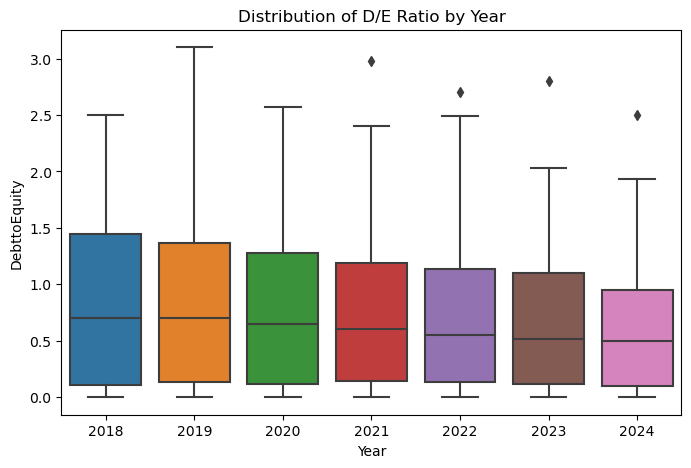

In [93]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Year', y='DebttoEquity')
plt.title('Distribution of D/E Ratio by Year')
plt.show()

****The central line represents the median Debt-to-Equity ratio, while the box captures the interquartile range (middle 50% of firms). Whiskers reflect the broader distribution, with outliers indicating firms operating with unusually high or low leverage levels.****

**Insight:** The gradual downward shift in the median and overall distribution post-2021 suggests broad-based deleveraging and balance sheet strengthening across Nifty 50 firms.

In [94]:
df_sorted.groupby('Company Name')['DebttoEquity'].agg(['first', 'last'])

,first,last
Company Name,,
Aditya Birla Fashion and Retail,1.80,1.2000
Ashok Leyland,1.10,0.5000
Aurobindo Pharma,0.26,0.1400
Axis Bank,1.60,0.9500
Bajaj Auto,0.03,0.0300
Bajaj Finserv,1.70,2.5000
Bandhan Bank,1.25,0.7600
Bharat Petroleum,0.98,0.8500
Bharti Airtel Ltd,1.80,1.5000


In [95]:
de_change_summary = df_sorted.groupby('Company Name')['DebttoEquity'].agg(['first', 'last'])

In [96]:
de_change_summary['Absolute_Change'] = (
    de_change_summary['last'] - de_change_summary['first']
)


In [97]:
(de_change_summary['Absolute_Change'] < 0).mean()

0.6326530612244898

In [98]:
df_summary_filtered = df_summary[
    df_summary['Profit_Pct_Change'].between(-200, 200)
]

<Axes: xlabel='DE_Change', ylabel='Profit_Pct_Change'>

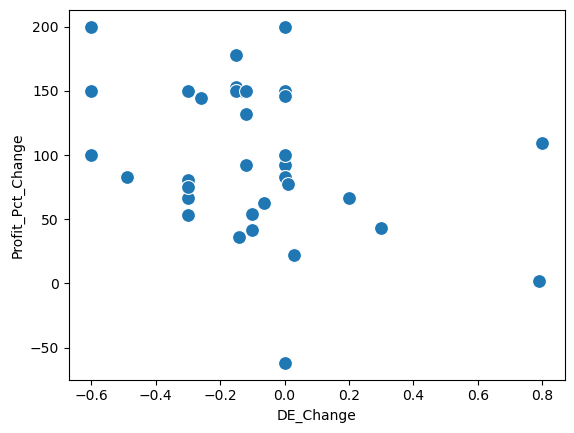

In [99]:
sns.scatterplot(
    data=df_summary_filtered,
    x='DE_Change',
    y='Profit_Pct_Change',
    s=100
)

**** The scatter plot maps firm-level changes in leverage (DE_Change) against percentage changes in profitability (Profit_Pct_Change), allowing visual assessment of the relationship between capital structure adjustments and earnings performance.**

**Insight:** While a majority of firms engaged in deleveraging, the dispersion in the scatter indicates that profit growth outcomes varied significantly across companies. The weak-to-moderate association suggests that leverage reduction alone was not a primary driver of earnings improvement in the post-COVID recovery phase.

In [100]:
df_summary_filtered[['DE_Change', 'Profit_Pct_Change']].corr()

,DE_Change,Profit_Pct_Change
DE_Change,1.000000,-0.338876
Profit_Pct_Change,-0.338876,1.000000


In [102]:
df_summary = pd.DataFrame(summary)

In [103]:
df_summary_filtered = df_summary[
    df_summary['Profit_Pct_Change'].between(-200, 200)
]

In [104]:
q1 = df_summary_filtered[(df_summary_filtered['DE_Change'] > 0) & (df_summary_filtered['Profit_Pct_Change'] > 0)]
q2 = df_summary_filtered[(df_summary_filtered['DE_Change'] < 0) & (df_summary_filtered['Profit_Pct_Change'] > 0)]
q3 = df_summary_filtered[(df_summary_filtered['DE_Change'] < 0) & (df_summary_filtered['Profit_Pct_Change'] < 0)]
q4 = df_summary_filtered[(df_summary_filtered['DE_Change'] > 0) & (df_summary_filtered['Profit_Pct_Change'] < 0)]

correlation = df_summary_filtered['DE_Change'].corr(df_summary_filtered['Profit_Pct_Change'])

print("Companies with:")
print(f"- Improved profit & increased D/E (Q1): {len(q1)}")
print(f"- Improved profit & reduced D/E (Q2): {len(q2)}")
print(f"- Lower profit & reduced D/E (Q3): {len(q3)}")
print(f"- Lower profit & increased D/E (Q4): {len(q4)}")
print(f"\nCorrelation between D/E change and profit change: {round(correlation, 2)}")

Companies with:
- Improved profit & increased D/E (Q1): 7
- Improved profit & reduced D/E (Q2): 21
- Lower profit & reduced D/E (Q3): 0
- Lower profit & increased D/E (Q4): 0

Correlation between D/E change and profit change: -0.34


In [105]:
df_summary = pd.DataFrame(summary)

In [106]:
df_summary_filtered = df_summary[
    df_summary['Profit_Pct_Change'].between(-200, 200)
]

In [107]:
import statsmodels.api as sm

# Independent and dependent variables
X = df_summary_filtered['DE_Change']
y = df_summary_filtered['Profit_Pct_Change']

# Add constant (intercept)
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()

# Show summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Profit_Pct_Change   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     4.411
Date:                Tue, 24 Feb 2026   Prob (F-statistic):             0.0432
Time:                        01:23:18   Log-Likelihood:                -194.48
No. Observations:                  36   AIC:                             393.0
Df Residuals:                      34   BIC:                             396.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.6429      9.629      9.310      0.0

## Conclusion
The analysis indicates that a majority of Nifty 50 firms reduced leverage in the post-COVID period, reflecting broad-based balance sheet strengthening. Regression results show a statistically significant but economically modest relationship between deleveraging and profit growth. However, the low explanatory power of the model suggests that capital structure adjustments were not the primary driver of earnings recovery. Instead, operational improvements and macroeconomic normalization likely played a more substantial role in post-pandemic profitability trends.